# Proyek Analisis Data : E-Commerce Public Dataset


*   Nama  : Fanza Eldanendra
*   Email : Fanza2003@gmail.com
*   ID    : 7385102

# Menentukan Pertanyaan Bisnis
1. Category barang yang paling banyak dibeli dan paling sedikit diminati?
2. Berapa lama rata-rata pengiriman paket pengiriman paket terlama ? dari mana ke mana?
3. Berapa rata-rata payment value dari tiap tipe transaksi? dan transaksi tipe apa yang paling sering digunakan?
4. Bagaimana perbandingan penjualan tahun 2017 dan 2018?
5. Bulan apa yang terjadi peningkatan penjualan tertinggi?
6. Bagian hari apa yang sering digunakan oleh pembeli untuk melakukan transaksi?

# Menyiapkan semua library yang dibutuhkan

In [1]:
import os
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Wrangling
## Gathering Data
menggabungkan data dan menghapus kolom yang tidak akan dianalisis.

In [3]:
from google.colab import drive
drive.mount('dataset')

Drive already mounted at dataset; to attempt to forcibly remount, call drive.mount("dataset", force_remount=True).


In [4]:
customer = pd.read_csv("/content/dataset/MyDrive/dataset/customers_dataset.csv")
print(customer.shape)
customer.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
order_items = pd.read_csv("/content/dataset/MyDrive/dataset/order_items_dataset.csv")
print(order_items.shape)
order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments = pd.read_csv("/content/dataset/MyDrive/dataset/order_payments_dataset.csv")
print(payments.shape)
payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orders = pd.read_csv("/content/dataset/MyDrive/dataset/orders_dataset.csv")
print(orders.shape)
orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
products = pd.read_csv("/content/dataset/MyDrive/dataset/products_dataset.csv")
print(products.shape)
products.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
sellers = pd.read_csv("/content/dataset/MyDrive/dataset/sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
products_translation = pd.read_csv("/content/dataset/MyDrive/dataset/product_category_name_translation.csv")
print(products_translation.shape)
products_translation.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
geolocation = pd.read_csv("/content/dataset/MyDrive/dataset/geolocation_dataset.csv")
print(geolocation.shape)
geolocation.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### menggabungkan data dalam beberapa dataframe

dalam proyek ini, terdapat 2 dataframe yang akan digunakan yaitu, `df_order_items_dataset` dan `orders_dataset`.
<br>
`df_order_items_dataset` : gabungan dari tabel order_items, products_translation, dan seller. <br>
`orders_dataset` : gabungan dari tabel orders, payments, dan customer

In [12]:
# menggabungkan product dengan products_translation
products = pd.merge(products, products_translation, on='product_category_name', how='left')

In [13]:
df_product = products[["product_id","product_category_name_english","product_category_name"]]
print(df_product.shape)
# df_product.head()
df_product.loc[df_product["product_category_name_english"].isnull()]

(32951, 3)


,product_id,product_category_name_english,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN
...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN


In [14]:
# menggabugkan order_items dengan df_products menjadi df_order_items
# order_items = order_items.drop(columns = ['shipping_limit_date'])
df_order_items = order_items.merge(df_product, left_on='product_id', right_on='product_id',how='left')

In [15]:
# menggabungkan df_order_items dengan seller
sellers = sellers.drop(columns = ['seller_zip_code_prefix'])
df_order_items = df_order_items.merge(sellers, left_on='seller_id', right_on='seller_id',how='left')
print(df_order_items.shape)
df_order_items.head()

(112650, 11)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim,loanda,PR


In [16]:
# menggabungkan orders dengan payments
payments = payments.drop(columns = ['payment_sequential','payment_installments'])
orders = orders.merge(payments, left_on='order_id', right_on='order_id',how='left')

In [17]:
# menggabungkan orders dengan customers
customer = customer.drop(columns = ['customer_unique_id'])
orders = orders.merge(customer, left_on='customer_id', right_on='customer_id',how='left')

In [18]:
print(orders.shape)
orders.head()

(103887, 13)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12,75265,vianopolis,GO


## Assessing Data
melakukan pemeriksaan data sebelum melakukan analisis data. Pada tahap ini akan mengecek tipe data, missing value, duplikat data, dan parameter statistik.

### Menilai Data `df_order_items_dataset`

In [19]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name_english  111023 non-null  object 
 8   product_category_name          111047 non-null  object 
 9   seller_city                    112650 non-null  object 
 10  seller_state                   112650 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.3+ MB


terdapat tipe data yang tidak sesuai, yaitu kolom `shipping_limit_date` seharusnya bertipe datetime.

In [20]:
print(df_order_items.shape)
df_order_items.isnull().sum()

(112650, 11)


order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name_english    1627
product_category_name            1603
seller_city                         0
seller_state                        0
dtype: int64

terdapat 1627 missing value pada kolom `product_category_name_english`

In [21]:
print("Jumlah duplikasi: ", df_order_items.duplicated().sum())
df_order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


tidak terdapat data yang duplikat, namun ada outlier pada kolom price dan freight_value.

### Menilai Data `orders`


In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_type                   103886 non-null  object 
 9   payment_value                  103886 non-null  float64
 10  customer_zip_code_prefix       103887 non-null  int64  
 11  customer_city                  103887 non-null  object 
 12  customer_state                

In [23]:
print(orders.shape)
orders.isnull().sum()

(103887, 13)


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_type                        1
payment_value                       1
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

terdapat 175 missing value pada kolom `order_approved_at`, 1888 pada kolom `order_delivered_carrier_date`, 3132 pada kolom `order_delivered_customer_date`, 1 pada kolom `payment_type`, dan 1 pada kolom `payment_value`. missing value yang terdapat pada kolom tersebut terjadi karena order status berupa 'shipped' atau 'canceled'.

In [24]:
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

Jumlah duplikasi:  615


,payment_value,customer_zip_code_prefix
count,103886.000000,103887.000000
mean,154.100380,35072.353490
std,217.494064,29743.416343
min,0.000000,1003.000000
25%,56.790000,11367.500000
50%,100.000000,24360.000000
75%,171.837500,58418.000000
max,13664.080000,99990.000000


terdapat 615 baris yang duplikat dan outlier pada kolom payment_value.

## Cleaning Data


### Membersihkan Data `df_order_items`

In [25]:
#data types
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name_english  111023 non-null  object        
 8   product_category_name          111047 non-null  object        
 9   seller_city                    112650 non-null  object        
 10  seller_state                   112650 non-null  object        
dtype

In [26]:
# missing value pada kolom product_category_name_english
x = df_order_items.loc[df_order_items["product_category_name"].notnull() & df_order_items["product_category_name_english"].isnull()]
set(x["product_category_name"])

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

karena dalam kolom `product_category_name_english` terdapat data NaN, sedangkan kolom `product_category_name` mempunyai datanya, maka data tersebut akan diterjemahkan untuk mengganti data yang kosong pada kolom `product_category_name_english`. sedangkan untuk data null lainnya akan didefinisikan sebagai 'not defined'.

In [27]:
df_order_items['product_category_name'].fillna('not defined', inplace=True)
df_order_items['product_category_name_english'].fillna('not defined', inplace=True)

df_order_items["product_category_name_english"] = np.where(df_order_items["product_category_name"] == 'pc_gamer', 'PC Gaming', df_order_items["product_category_name_english"])
df_order_items["product_category_name_english"] = np.where(df_order_items["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos', 'portable kitchen food preparers', df_order_items["product_category_name_english"])

In [28]:
#cek kembali missing value pada df_order_items
df_order_items.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name_english    0
product_category_name            0
seller_city                      0
seller_state                     0
dtype: int64

In [29]:
# duplicate data
df_order_items.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", df_order_items.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
# #menambahkan kolom year dan month
# df_order_items['year'] = df_order_items['shipping_limit_date'].dt.strftime('%Y')
# df_order_items['month'] = df_order_items['shipping_limit_date'].dt.strftime('%m-%Y')
# df_order_items

### Membersihkan Data `orders`

In [31]:
# membenarkan data types
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_status'] = orders['order_status'].astype('category')

orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  category      
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   payment_type                   103886 non-null  object        
 9   payment_value                  103886 non-null  float64       
 10  customer_zip_code_prefix       103887 non-null  int64         
 11  

In [32]:
 orders.loc[orders['order_status'] == 'shipped']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state
49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,boleto,22.36,13215,jundiai,SP
161,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,boleto,69.12,38600,paracatu,MG
169,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08,credit_card,63.79,54762,camaragibe,PE
241,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13,credit_card,240.23,91450,porto alegre,RS
314,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03,credit_card,865.01,20910,rio de janeiro,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103196,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03,boleto,121.90,25942,guapimirim,RJ
103354,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26,credit_card,280.42,8270,sao paulo,SP
103543,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24,credit_card,9.31,49030,aracaju,SE
103544,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24,voucher,48.63,49030,aracaju,SE


In [33]:
orders = orders.dropna(subset = ["payment_type","payment_value"])
print(orders.shape)
orders.isna().sum()

(103886, 13)


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_type                        0
payment_value                       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

karena missing value dalam table `orders` kebanyakan merupakan tipe data datetime yang menyangkut tentang waktu pengiriman paket, maka paket yang belum sampai kepada kurir atau pelanggan akan menjadi missing value. missing value ini juga berpengaruh pada order_status, maka missing value dengan tipe datetime tidak akan dihapus.

In [34]:
# duplicate data
orders = orders.drop_duplicates()
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


In [35]:
# menambahkan kolom untuk EDA
orders['year'] = orders['order_purchase_timestamp'].dt.strftime('%Y')
orders['month'] = orders['order_purchase_timestamp'].dt.strftime('%m-%Y')
# df_order_items

orders["lama_pengiriman_hari"] = (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]).dt.days
orders["hari_pembelian"] = orders["order_purchase_timestamp"].dt.strftime('%A')

orders['jam_pembelian'] = orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Subuh', 'Pagi', 'Siang', 'Malam']
orders['waktu_hari_pembelian'] = pd.cut(orders['jam_pembelian'], hours_bins, labels=hours_labels)

# Exploratory Data Analysis (EDA)
tahap ini berguna untuk mengenal data yang akan ditangani sehingga dapat menganalisis data dengan efisien.

In [36]:
# mendefinisikan fungsi yang akan digunakan untuk EDA
def range(series):
    return series.max() - series.min()

## Explore table `df_order_items`


In [37]:
df_order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_city,seller_state
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650,112650,112650,112650
unique,98666,NaN,32951,3095,93318,NaN,NaN,74,74,611,23
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,bed_bath_table,cama_mesa_banho,sao paulo,SP
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115,27983,80342
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,NaN,NaN,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,NaN


terdapat range yang luas pada kolom price san fright_value. dari rangkuman parameter statistik diatas dapat dilihat categori yang paling laris adalah bed_bath_table, dengan sao paulo (SP) brazil merupakan kota yang aktif menjual.

###  price dengan category

In [38]:
df_order_items.groupby(by="product_category_name_english").agg({
    "product_id": "count", #jumlah pembelian
    "price": ["max", "min", "mean", range]
}).sort_values(by=("product_id", "count"), ascending=False)

product_id    price                             
                                   count      max     min        mean    range
product_category_name_english                                                 
bed_bath_table                     11115  1999.98    6.99   93.296327  1992.99
health_beauty                       9670  3124.00    1.20  130.163531  3122.80
sports_leisure                      8641  4059.00    4.50  114.344285  4054.50
furniture_decor                     8334  1899.00    4.90   87.564494  1894.10
computers_accessories               7827  3699.99    3.90  116.513903  3696.09
...                                  ...      ...     ...         ...      ...
cds_dvds_musicals                     14    65.00   45.00   52.142857    20.00
la_cuisine                            14   389.00   24.00  146.785000   365.00
PC Gaming                              9   239.00  129.99  171.772222   109.01
fashion_childrens_clothes              8   110.00   39.99   71.231250    70.01
security_and_services                  2   183.29  100.00  141.645000    83.29

[74 rows x 5 columns]

bed_bath_table, health_beauty, sports_leisure, furniture_decor, dan computers_accessories merupakan category dengan pembelian terbanyak. Begitupula harga yang dijual dalam Brazilian E-Commerce ini sangat bervasiasi bahkan dalam satu kategorinya, range nya cukup besar.

### persebaran kota penjual

In [39]:
df_order_items.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

### persebaran state penjual

In [40]:
df_order_items.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### seller, banyak produk, total order, dan range price

In [41]:
df_order_items.groupby(by="seller_id").agg({
    "product_id": "nunique",
    "order_id": "nunique",
    "price": ["max", "min", "mean", range]
}).sort_values(by=("order_id", "nunique"), ascending=False)

product_id order_id   price          \
                                    nunique  nunique     max     min   
seller_id                                                              
6560211a19b47992c3666cc44a7e94c0        256     1854  249.00   16.00   
4a3ca9315b744ce9f8e9374361493884        399     1806  884.00   12.90   
cc419e0650a3c5ba77189a1882b7556a         37     1706  229.99    6.00   
1f50f920176fa81dab994f9023523100         23     1404  119.90   38.90   
da8622b14eb17ae2831f4ac5b9dab84a        222     1314  429.90    9.90   
...                                     ...      ...     ...     ...   
ceb7b4fb9401cd378de7886317ad1b47          1        1  399.90  399.90   
cecd97bc34ed8330bd4cd15713eda670          1        1   57.99   57.99   
5b92bfa4120daa27c574daa2e386c693          1        1   14.00   14.00   
5aaa890629f83706d8d9bfecd8377c1c          1        1   48.90   48.90   
7d81e74a4755b552267cd5e081563028          1        1   32.50   32.50   

                                                      
                                        mean   range  
seller_id                                             
6560211a19b47992c3666cc44a7e94c0   60.651663  233.00  
4a3ca9315b744ce9f8e9374361493884  100.892260  871.10  
cc419e0650a3c5ba77189a1882b7556a   58.754039  223.99  
1f50f920176fa81dab994f9023523100   55.380223   81.00  
da8622b14eb17ae2831f4ac5b9dab84a  103.311779  420.00  
...                                      ...     ...  
ceb7b4fb9401cd378de7886317ad1b47  399.900000    0.00  
cecd97bc34ed8330bd4cd15713eda670   57.990000    0.00  
5b92bfa4120daa27c574daa2e386c693   14.000000    0.00  
5aaa890629f83706d8d9bfecd8377c1c   48.900000    0.00  
7d81e74a4755b552267cd5e081563028   32.500000    0.00  

[3095 rows x 6 columns]

terlihat best seller pada umumnya memiliki banyak produk

### melihat persebaran jumlah order disetiap tahun dan bulannya

In [42]:
orders.groupby(by="year").order_id.nunique()

year
2016      328
2017    45101
2018    54011
Name: order_id, dtype: int64

In [43]:
orders.groupby(by="month").order_id.nunique()

month
01-2017     800
01-2018    7269
02-2017    1780
02-2018    6728
03-2017    2682
03-2018    7211
04-2017    2404
04-2018    6939
05-2017    3700
05-2018    6873
06-2017    3245
06-2018    6167
07-2017    4026
07-2018    6292
08-2017    4331
08-2018    6512
09-2016       3
09-2017    4285
09-2018      16
10-2016     324
10-2017    4631
10-2018       4
11-2017    7544
12-2016       1
12-2017    5673
Name: order_id, dtype: int64

dari dua code diatas, dapat dilihat bahwa persebaran order tidak merata karena order pada tahun 2020 hanya ada dibulan februari dan april, sedangkan 2016 hanya terdapat di 2 bulan yaitu oktober dan desember. Begitupula untuk tahun 2018  yang tidak genap 1 tahun, yaitu hanya terdapat pada bulan januari hingga agustus  sehingga hanya tahun 2017 yang memiliki data lengkap tetang jumlah ordernya.

## Explore table `orders`


In [44]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state,year,month,lama_pengiriman_hari,hari_pembelian,jam_pembelian,waktu_hari_pembelian
count,103271,103271,103271,103271,103106,101410,100172,103271,103271,103271.000000,103271.000000,103271,103271,103271,103271,100171.000000,103271,103271.000000,103271
unique,99440,99440,8,98874,90732,81017,95663,458,5,NaN,NaN,4119,27,3,25,NaN,7,NaN,4
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,credit_card,NaN,NaN,sao paulo,SP,2018,11-2017,NaN,Monday,NaN,Siang
freq,25,25,100174,25,25,47,22,560,76782,NaN,NaN,16104,43332,55738,7816,NaN,16766,NaN,39508
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.845047,35088.683909,NaN,NaN,NaN,NaN,8.892574,NaN,14.780297,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.897537,29750.470243,NaN,NaN,NaN,NaN,8.757410,NaN,5.332535,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1003.000000,NaN,NaN,NaN,NaN,-17.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.490000,11380.000000,NaN,NaN,NaN,NaN,4.000000,NaN,11.000000,NaN


### melihat naik turunnya penjualan disetiap bulan 2017

In [45]:
df_order_2017 = orders[orders['year'] == '2017']
x = df_order_2017.groupby('month')['order_id'].nunique()
x_diff  = x.diff().fillna(0)
print(x_diff)

# dalam persentase
print("----\npersentase kenaikan penjualan : ")
x_percentage = x.pct_change().fillna(0) * 100
x_percentage

month
01-2017       0.0
02-2017     980.0
03-2017     902.0
04-2017    -278.0
05-2017    1296.0
06-2017    -455.0
07-2017     781.0
08-2017     305.0
09-2017     -46.0
10-2017     346.0
11-2017    2913.0
12-2017   -1871.0
Name: order_id, dtype: float64
----
persentase kenaikan penjualan : 


month
01-2017      0.000000
02-2017    122.500000
03-2017     50.674157
04-2017    -10.365399
05-2017     53.910150
06-2017    -12.297297
07-2017     24.067797
08-2017      7.575758
09-2017     -1.062110
10-2017      8.074679
11-2017     62.902181
12-2017    -24.801166
Name: order_id, dtype: float64

dari statistik diatas, payment value terdiri dari range nilai yang luas, diperkirakan terdapat kesalahan pada input data dikolom order_delivered_customer_date karena nilai minimal kolom pengiriman bernilai minus. data yang terjadi kesalahan tersebut akan dihapus.

In [46]:
orders = orders[orders["lama_pengiriman_hari"] > 0]

### penjualan per hari dan bagiannya

In [47]:
orders.groupby(by="hari_pembelian").order_id.nunique().sort_values(ascending=False)

hari_pembelian
Monday       15258
Tuesday      15045
Wednesday    14645
Thursday     13961
Friday       13320
Sunday       11253
Saturday     10285
Name: order_id, dtype: int64

In [48]:
orders.groupby(by="waktu_hari_pembelian").order_id.nunique().sort_values(ascending=False)

waktu_hari_pembelian
Siang    35927
Malam    26756
Pagi     26152
Subuh     4932
Name: order_id, dtype: int64

In [49]:
orders.groupby(["hari_pembelian", 'waktu_hari_pembelian'])['order_id'].nunique().sort_values(ascending=False).reset_index()

,hari_pembelian,waktu_hari_pembelian,order_id
0,Monday,Siang,5855
1,Tuesday,Siang,5782
2,Wednesday,Siang,5560
3,Thursday,Siang,5357
4,Friday,Siang,5150
5,Monday,Malam,4537
6,Tuesday,Malam,4316
7,Wednesday,Pagi,4296
8,Tuesday,Pagi,4291
9,Sunday,Siang,4252


banyaknya penjualan harian tertinggi berada pada hari senin, dan terendah di hari sabtu dengan waktu siang di hari kerja merupakan puncak pembelian oleh konsumen.

### payment_type

In [50]:
orders.groupby(by="payment_type").payment_value.mean().sort_values(ascending=False)

payment_type
credit_card    163.022616
boleto         144.934140
debit_card     140.778868
voucher         66.913499
Name: payment_value, dtype: float64

pembeli yang menggunakan type transaksi credit card memiliki rata-rata pembayaran paling tinggi dibanding tipe traksaksi lainnya sedangkan tipe voucher  melakukan transaksi dengan rata-rata pembayaran paling kecil.

In [51]:
orders.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    72200
boleto         18683
voucher         3569
debit_card      1439
Name: order_id, dtype: int64

tipe transaksi credit card paling banyak digunakan oleh pembeli sedangkan debit card yang paling sedikit digunakan dibandingkan dengan tipe transaksi lainnya.

### lama pengiriman paket
menggunakan nilai median karena terdapat outlier.

In [52]:
orders.groupby(by="customer_city").lama_pengiriman_hari.median().sort_values(ascending=False)

customer_city
novo brasil          145.0
capinzal do norte    103.5
adhemar de barros     92.0
arace                 91.5
marcelino vieira      71.0
                     ...  
iomere                 2.0
moeda                  1.0
bento de abreu         1.0
delfim moreira         1.0
bacaxa                 1.0
Name: lama_pengiriman_hari, Length: 4083, dtype: float64

In [53]:
# menggabungkan customer dengan seller
cust = orders[["customer_city","customer_state","lama_pengiriman_hari","order_id","customer_id"]]
seller = df_order_items[["order_id","seller_id","seller_city","seller_state"]]
cust_seller = cust.merge(seller, left_on='order_id', right_on='order_id',how='left')
cust_seller.describe()

,lama_pengiriman_hari
count,111043.000000
mean,9.012995
std,8.621737
min,1.000000
25%,4.000000
50%,7.000000
75%,12.000000
max,205.000000


In [54]:
# duplicate data
cust_seller = cust_seller.drop_duplicates()
print("Jumlah duplikasi: ", cust_seller.duplicated().sum())

Jumlah duplikasi:  0


In [55]:
# lama pengiriman antar state
cust_seller.groupby(['seller_state', 'customer_state'])['lama_pengiriman_hari'].median().sort_values(ascending=False).reset_index()

,seller_state,customer_state,lama_pengiriman_hari
0,CE,AM,138.0
1,AM,AL,87.0
2,BA,AC,63.0
3,GO,AM,29.5
4,RO,SE,28.0
...,...,...,...
407,GO,GO,2.5
408,RJ,RJ,2.0
409,RN,RN,2.0
410,PI,PI,1.0


In [56]:
# lama pengiriman antar city
cust_seller.groupby(['seller_city', 'customer_city'])['lama_pengiriman_hari'].median().sort_values(ascending=False).reset_index()

,seller_city,customer_city,lama_pengiriman_hari
0,belo horizonte,montanha,195.0
1,uberaba,lagarto,194.0
2,aracatuba,aracaju,187.0
3,farroupilha,paulinia,186.0
4,itajobi,perdizes,182.0
...,...,...,...
35429,mogi das cruzes,maua,1.0
35430,mogi das cruzes,mogi das cruzes,1.0
35431,mogi das cruzes,monte mor,1.0
35432,jacarei,holambra,1.0


# Visualization & Explanatory Analysis

## Pertanyaan 1: Category barang yang paling banyak dibeli dan paling sedikit diminati?


In [57]:
df_category = df_order_items.groupby(by="product_category_name_english")["product_id"].count().reset_index() #jumlah pembelian
df_category = df_category.rename(columns={"product_category_name_english": "category", "product_id": "orders"})
# df_category

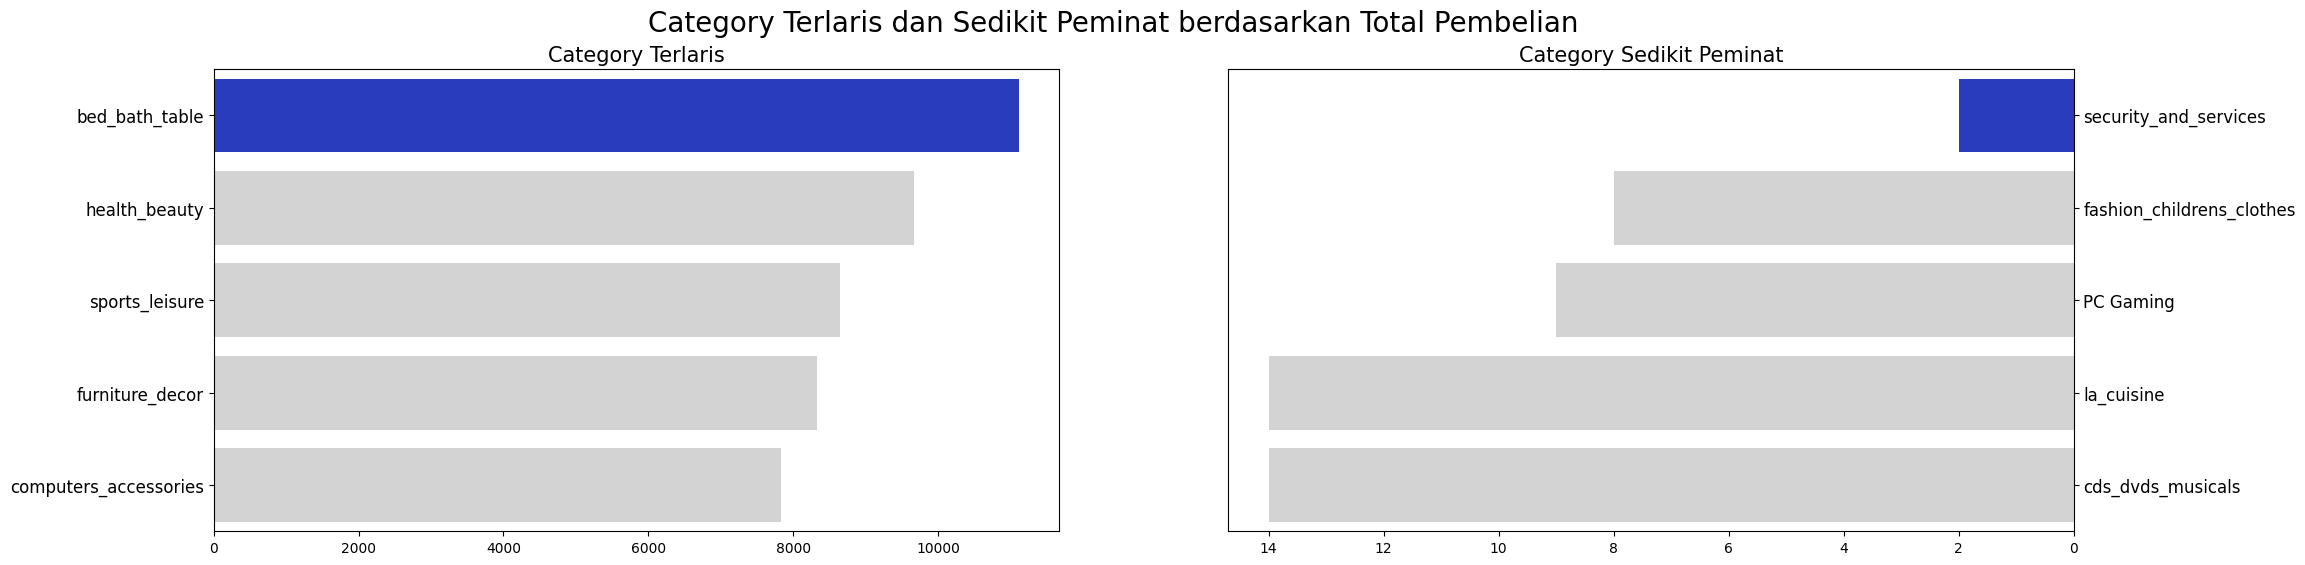

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#102cd4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="orders", y="category", data=df_category.sort_values(by="orders", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Category Terlaris", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="orders", y="category", data=df_category.sort_values(by="orders", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Category Sedikit Peminat", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Category Terlaris dan Sedikit Peminat berdasarkan Total Pembelian", fontsize=20)
plt.show()

dari kedua grafik diatas, dapat diketahui bed_bath_table merupakan caterogy yang paling banyak dibeli sedangkan security dan service adalah ketogori yang paling sedikit dibeli.

## Pertanyaan 2: Berapa lama rata-rata pengiriman paket pengiriman paket terlama ? dari mana ke mana?


### pengiriman antar state

In [59]:
df_pengiriman_state = cust_seller.groupby(['seller_state', 'customer_state'])['lama_pengiriman_hari'].mean().sort_values(ascending=False).reset_index()
df_pengiriman_state

,seller_state,customer_state,lama_pengiriman_hari
0,CE,AM,138.000000
1,AM,AL,87.000000
2,BA,AC,63.000000
3,ES,PA,34.000000
4,GO,AM,29.500000
...,...,...,...
407,PA,PR,3.000000
408,PB,RN,3.000000
409,RN,RN,2.571429
410,DF,DF,1.756098


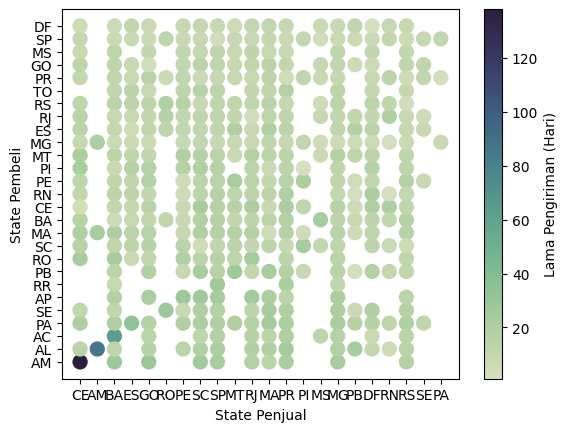

In [60]:
cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

plt.scatter(df_pengiriman_state['seller_state'], df_pengiriman_state['customer_state'], c=df_pengiriman_state['lama_pengiriman_hari'], cmap=cmap, s=100)
plt.xlabel('State Penjual')
plt.ylabel('State Pembeli')

plt.colorbar(label='Lama Pengiriman (Hari)')
plt.show()

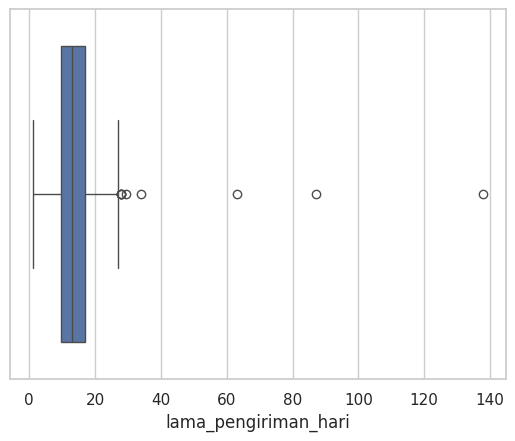

In [61]:
sns.set(style="whitegrid")
sns.boxplot(x=df_pengiriman_state['lama_pengiriman_hari'])
plt.show()

In [62]:
df_pengiriman_state.describe()

,lama_pengiriman_hari
count,412.000000
mean,14.035265
std,9.258877
min,1.000000
25%,9.748715
50%,12.960246
75%,16.925000
max,138.000000


In [63]:
Q1 = (df_pengiriman_state['lama_pengiriman_hari']).quantile(0.25)
Q3 = (df_pengiriman_state['lama_pengiriman_hari']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
maximum

27.689427166400844

In [64]:
df_pengiriman_state[df_pengiriman_state['lama_pengiriman_hari'] <= 27.69].head(1)

,seller_state,customer_state,lama_pengiriman_hari
9,SP,RR,27.030303


paket antar state yang paling lama dikirimkan adalah dalam waktu 138 hari, yaitu dari state CE ke AM. Namun, data ini merupakan data outlier sehingga dimungkinkan terjadi error saat input data. Adapun maximum yang tidak termasuk outlier adalah 27.69 hari yaitu dari state SP ke state RR.

### pengiriman antar kota

In [65]:
df_pengiriman_city = cust_seller.groupby(['seller_city', 'customer_city'])['lama_pengiriman_hari'].mean().sort_values(ascending=False).reset_index()
df_pengiriman_city

,seller_city,customer_city,lama_pengiriman_hari
0,belo horizonte,montanha,195.0
1,uberaba,lagarto,194.0
2,aracatuba,aracaju,187.0
3,farroupilha,paulinia,186.0
4,itajobi,perdizes,182.0
...,...,...,...
35429,santa barbara d oeste,sao caetano do sul,1.0
35430,sando andre,sao bernardo do campo,1.0
35431,belo horizonte,setubinha,1.0
35432,cajamar,limeira,1.0


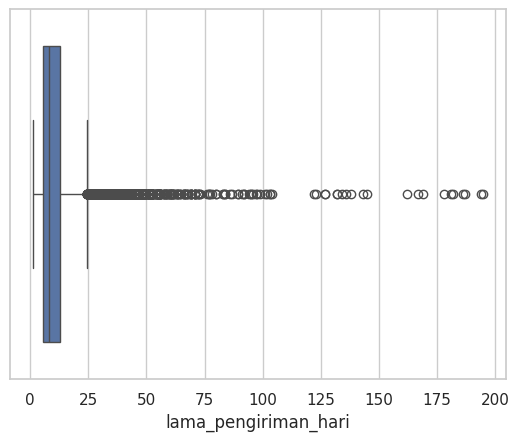

In [66]:
sns.set(style="whitegrid")  # Mengatur gaya plot

sns.boxplot(x=df_pengiriman_city['lama_pengiriman_hari'])
plt.show()

In [67]:
Q1 = (df_pengiriman_city['lama_pengiriman_hari']).quantile(0.25)
Q3 = (df_pengiriman_city['lama_pengiriman_hari']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
maximum

24.25

In [68]:
df_pengiriman_city[df_pengiriman_city['lama_pengiriman_hari'] <= 24.25].head(1)

,seller_city,customer_city,lama_pengiriman_hari
1768,sao jose dos campos,belem,24.25


paket antar kota yang paling lama dikirimkan adalah dalam waktu 195 hari, yaitu dari kota belo horizonte ke kota montanha. Namun, data ini merupakan data outlier sehingga dimungkinkan terjadi error saat input data. Adapun hari maximum yang tidak termasuk outlier untuk pengiriman antarkota adalah 24.3 hari yaitu dari kota sao jose dos campos ke kota belem.

## Pertanyaan 3: Berapa rata-rata payment value dari tiap tipe transaksi? dan transaksi tipe apa yang paling sering digunakan?

In [69]:
df_payment = orders.groupby(by="payment_type")["payment_value"].mean().reset_index()
df_payment

,payment_type,payment_value
0,boleto,144.934140
1,credit_card,163.022616
2,debit_card,140.778868
3,voucher,66.913499


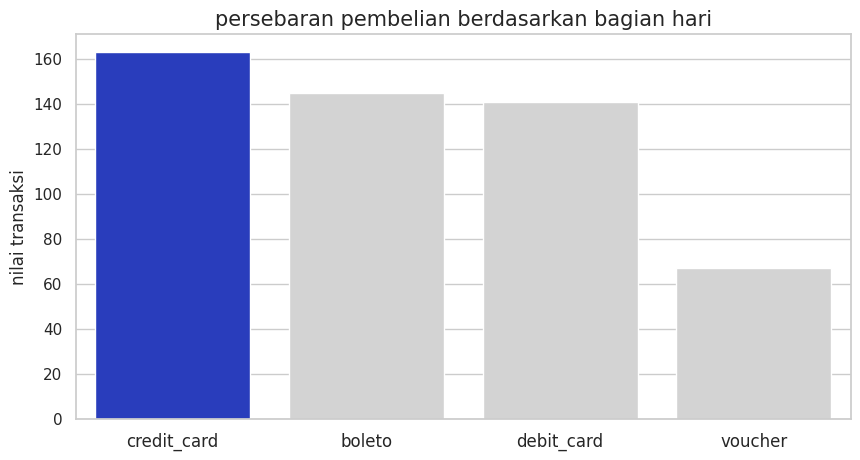

In [70]:
plt.figure(figsize=(10, 5))

colors = ["#102cd4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="payment_type",
    y="payment_value",
    data=df_payment.sort_values(by="payment_value", ascending = False),
    palette=colors
)
plt.title("persebaran pembelian berdasarkan bagian hari", loc="center", fontsize=15)
plt.ylabel("nilai transaksi")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Text(0.5, 1.0, 'Payment Type Distribution')

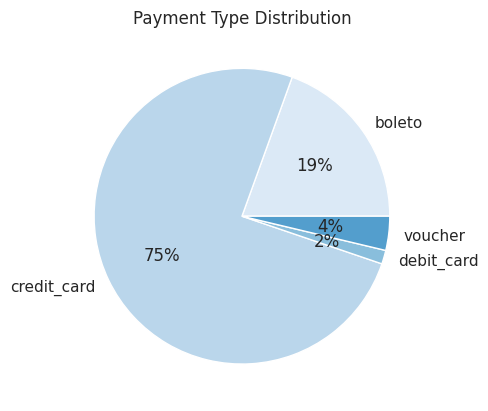

In [71]:
df_payment = orders.groupby(by="payment_type")["order_id"].nunique().reset_index()
palette_color = sns.color_palette('Blues')

plt.pie(df_payment["order_id"], labels=df_payment["payment_type"], colors=palette_color, autopct='%.0f%%')
plt.title("Payment Type Distribution")

penggunaan credit card adalah tipe transaksi yang paling sering digunakan dan digunankan untuk transaksi yang bernilai besar dibandingkan tipe transaksi lain.

## Pertanyaan 4: Bagaimana perbandingan penjualan tahun 2017 dan 2018?
karena tahun 2018 hanya terdata sampai bulan agustus maka dalam EDA ini,perbandingan dilakukan untuk bulan januari sampai agustus saja.

In [72]:
orders['nomor_bulan'] = orders['order_purchase_timestamp'].dt.strftime('%m')
df_tanggal_penjualan = orders.groupby(by=["nomor_bulan","year"]).order_id.nunique().reset_index()
df_tanggal_penjualan["nomor_bulan"] = df_tanggal_penjualan["nomor_bulan"].astype(str).astype(int)
df_tanggal_penjualan = df_tanggal_penjualan[df_tanggal_penjualan["nomor_bulan"] < 9]

month_names = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'Mei',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug'
}
df_tanggal_penjualan['nama_bulan'] = df_tanggal_penjualan['nomor_bulan'].map(month_names)

Text(0.5, 36.265625, '')

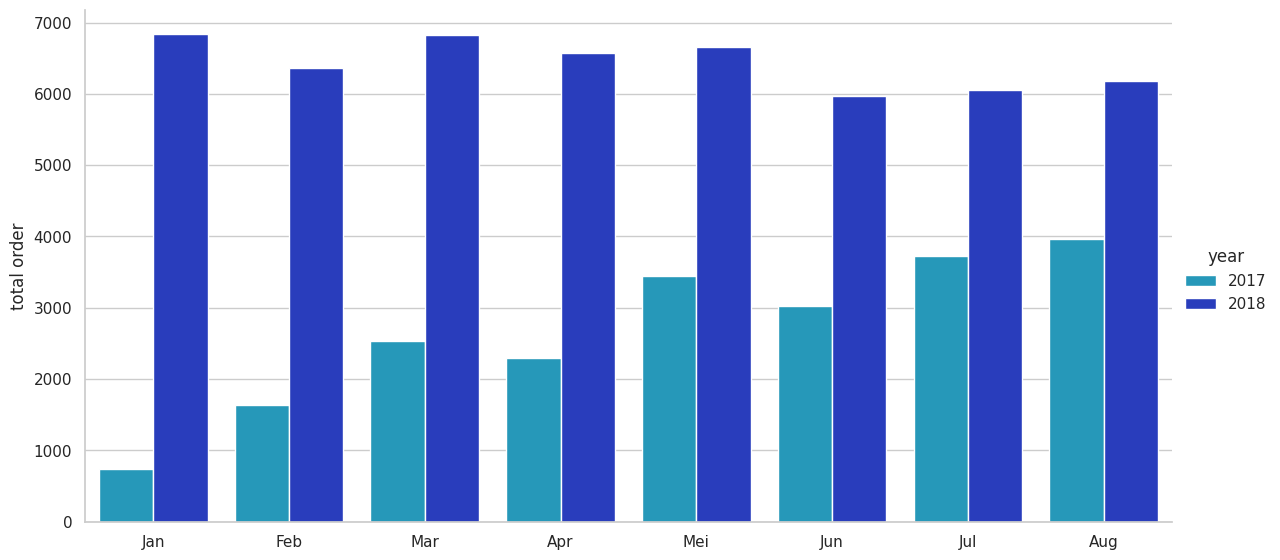

In [73]:
custom_palette = ["#0DA6D1", "#102cd4"]
sns.catplot(x='nama_bulan', y='order_id', hue='year', data=df_tanggal_penjualan, kind='bar', height=6, aspect=2, palette = custom_palette)
plt.ylabel("total order")
plt.xlabel(None)

In [74]:
df_tahun_penjualan = df_tanggal_penjualan.groupby("year").order_id.sum().reset_index()
df_tahun_penjualan

,year,order_id
0,2017,21364
1,2018,51461


In [75]:
#persentase kenaikan dari 2017 ke 2018
(51461 - 21364) / 21364 *100

140.87717655869687

pada tahun 2018, terjadi peningkatan pembelian secara signifikan dibandingkan tahun 2017 dengan peningkatan 140.87%.

## Pertanyaan 5: Bulan apa yang terjadi peningkatan penjualan tertinggi?


In [76]:
df_tanggal =  orders.groupby(by=["month","year"]).order_id.nunique().reset_index()
df_tanggal["month"] = pd.to_datetime(df_tanggal["month"], format='%m-%Y')
# df_tanggal

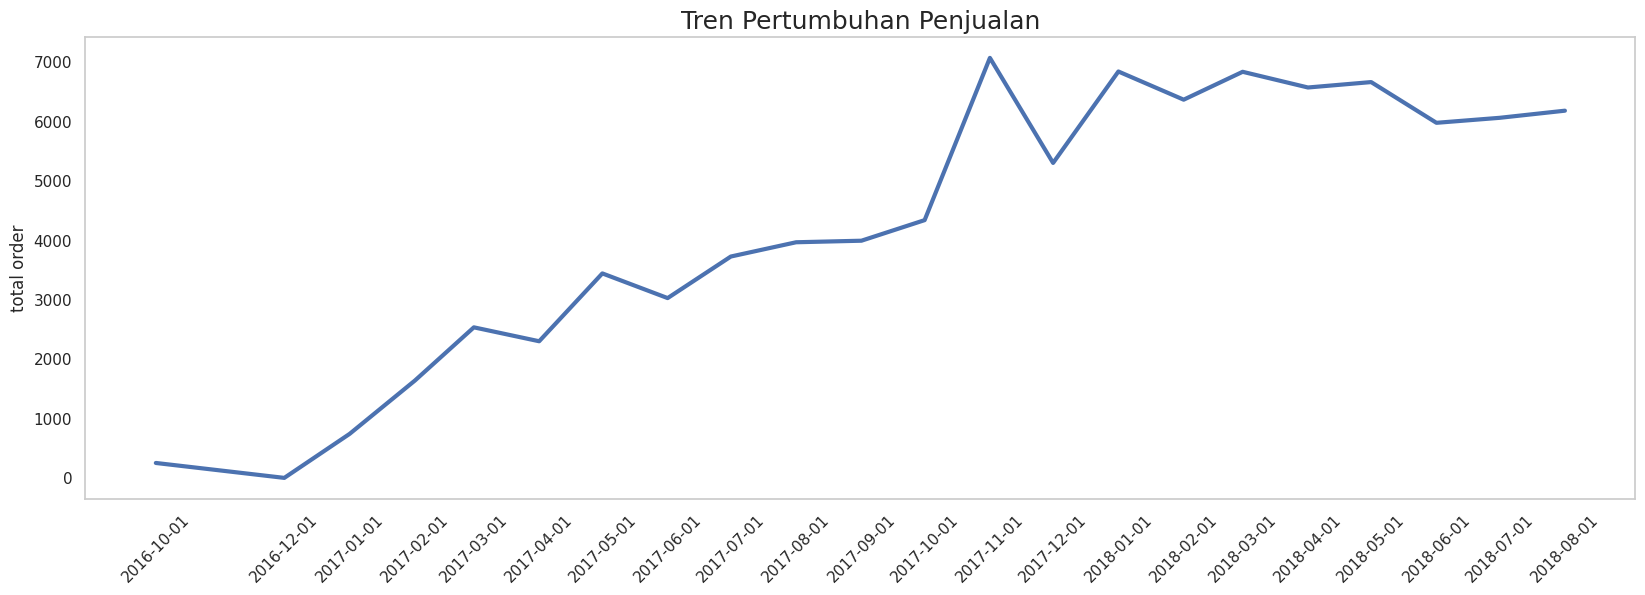

In [77]:
plt.figure(figsize=(20, 6))

ax = sns.lineplot(x='month', y='order_id', data=df_tanggal, estimator=None,linewidth=3)
ax.set(xticks=df_tanggal.month.values)

plt.title("Tren Pertumbuhan Penjualan", loc="center", fontsize=18)
plt.ylabel("total order")
plt.xlabel(None)
ax.grid(False)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [78]:
bulan_11 = orders[orders["nomor_bulan"] == '11']
bulan_11 = bulan_11.copy()
bulan_11['tanggal_hari'] = bulan_11['order_purchase_timestamp'].dt.strftime('%d')
bulan_11.groupby(by="tanggal_hari")["order_id"].nunique().sort_values(ascending=False).reset_index()

,tanggal_hari,order_id
0,24,1116
1,25,479
2,27,383
3,26,368
4,28,359
5,29,298
6,23,267
7,30,251
8,21,213
9,16,212


pembelian terbanyak terjadi pada bulan novembertahun 2017, terutama pada tanggal 24 November 2017.

## Pertanyaan 6: hari apa yang sering digunakan oleh pembeli untuk melakukan transaksi?


In [79]:
df_bagian_hari = orders.groupby(by="waktu_hari_pembelian")["order_id"].nunique().reset_index()
df_bagian_hari.rename(columns={
    "order_id": "total_orders"
}, inplace=True)
# df_bagian_hari

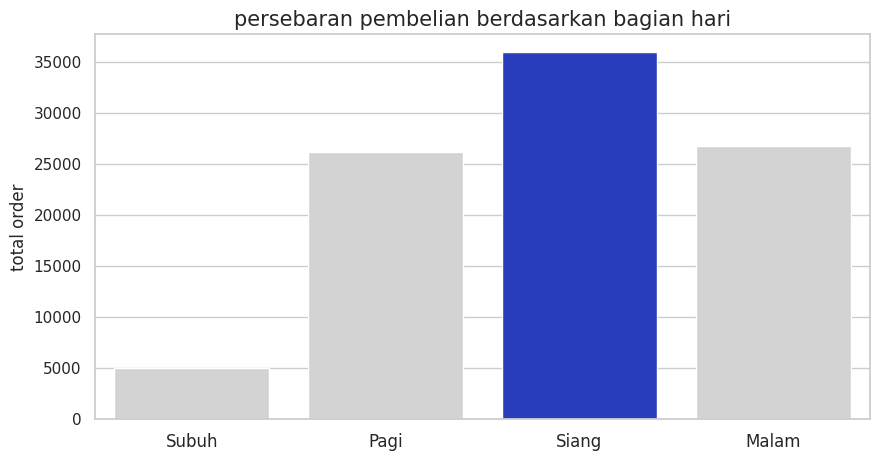

In [80]:
plt.figure(figsize=(10, 5))

colors = ["#D3D3D3", "#D3D3D3", "#102cd4", "#D3D3D3"]

sns.barplot(
    x="waktu_hari_pembelian",
    y="total_orders",
    data=df_bagian_hari.sort_values(by="total_orders"),
    palette=colors
)
plt.title("persebaran pembelian berdasarkan bagian hari", loc="center", fontsize=15)
plt.ylabel("total order")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [81]:
df_hari = orders.groupby(by="hari_pembelian").order_id.nunique().sort_values(ascending=False).reset_index()
df_hari.rename(columns={
    "order_id": "total_orders"
}, inplace=True)
df_hari

,hari_pembelian,total_orders
0,Monday,15258
1,Tuesday,15045
2,Wednesday,14645
3,Thursday,13961
4,Friday,13320
5,Sunday,11253
6,Saturday,10285


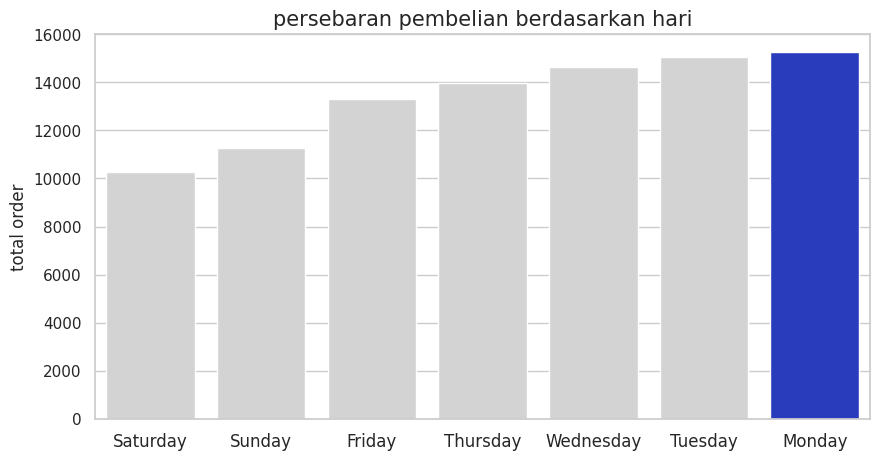

In [82]:
plt.figure(figsize=(10, 5))

colors = ["#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#102cd4"]

sns.barplot(
    x="hari_pembelian",
    y="total_orders",
    data=df_hari.sort_values(by="total_orders"),
    palette=colors
)
plt.title("persebaran pembelian berdasarkan hari", loc="center", fontsize=15)
plt.ylabel("total order")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Hari senin adalah hari yang paling banyak digunakan oleh konsumen untuk belanja dan umumnya konsumen melakukan transaksi pada siang hari.

# Conclusion
1. **Category barang yang paling banyak dibeli dan paling sedikit diminati?**
> Category yang paling diminati adalah bed_bath_table sebaliknya security dan service adalah kategori yang paling sedikit dibeli.

2. **Berapa lama rata-rata pengiriman paket pengiriman paket terlama ? dari mana ke mana?**
> setelah dilakukan pembersihan outlier, pengiriman terlama antarkota adalah 24.3 hari yaitu dari kota sao jose dos campos ke kota belem. Untuk pengiriman antarstate yang paling lama dikirimkan adalah 27.69 hari yaitu dari state SP ke state RR.

3. **Berapa rata-rata payment value dari tiap tipe transaksi? dan transaksi tipe apa yang paling sering digunakan?**
> 75% konsumen menggunakan tipe transaksi creditkan dengan rata-rata payment value sebesar 163.022616.

4. **Bagaimana perbandingan penjualan tahun 2017 dan 2018?**
> pada tahun 2018, terjadi peningkatan pembelian secara signifikan dibandingkan tahun 2017 yaitu meningkat sebanyak 140.87%.

5. **Bulan apa yang terjadi peningkatan penjualan tertinggi?**
> November 2017 adalah bulan dengan penjualan tertinggi, terutama di tanggal 24/11/2017.

6. **Bagian hari apa yang sering digunakan oleh pembeli untuk melakukan transaksi?**
> Hari senin adalah hari yang paling banyak digunakan oleh konsumen untuk belanja dan waktu paling aktif untuk berbelanja ada di siang hari.

In [83]:
file_path = 'orders.csv'
orders.to_csv(file_path, index=False)

file_path = 'order_items.csv'
df_order_items.to_csv(file_path, index=False)